# 1.0 SWAP dynamics

- Zero detuning:We comapre the DDE and WW solutions with exact TC model (Two qubit with one mode)
  
**Conclusion**:
- The DDE provides a good approximation to the WW model at all coupling strengths (maily refers weak coupling), and in the weak-coupling regime($g \ll FSR$) it can reproduce the dynamics of the Rabi model. 


Finished TC sim


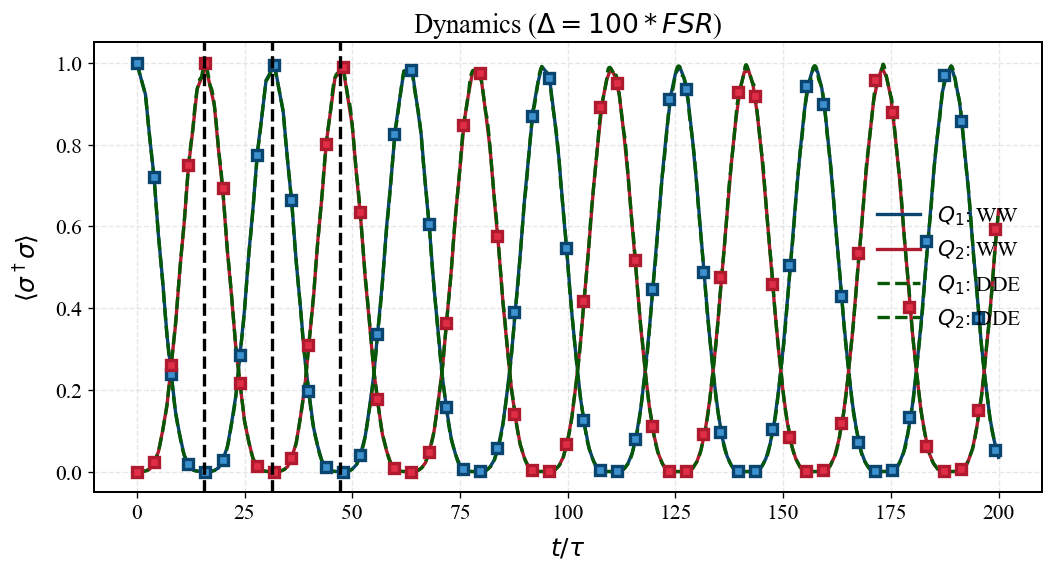

In [ ]:
from expt_sets import expt_001_dynamics
import numpy as np

expt_001_dynamics(
    Delta=100, gamma=0.04, tau=1, T=200, dt_max=0.01, n_steps=201, n_modes=100
)

# 1.1 Swap speed and Fidelity
Above, we found that two qubits can be passively swapped. 
Here, we will test the speed and fidelity of the swap.

**Conclusion** : 
- Because our DDE dynamics is piecewise-defined, if the Rabi frequency is not an integer multiple of τ, the position of the maximum fidelity in the DDE model will be mismatched and shifted relative to that in the Rabi model. This is why the speed follows the Rabi-frequency trend but exhibits oscillatory fluctuations, and also why the fidelity shows corresponding up-and-down variations.

[load] expt_002_cache.npz


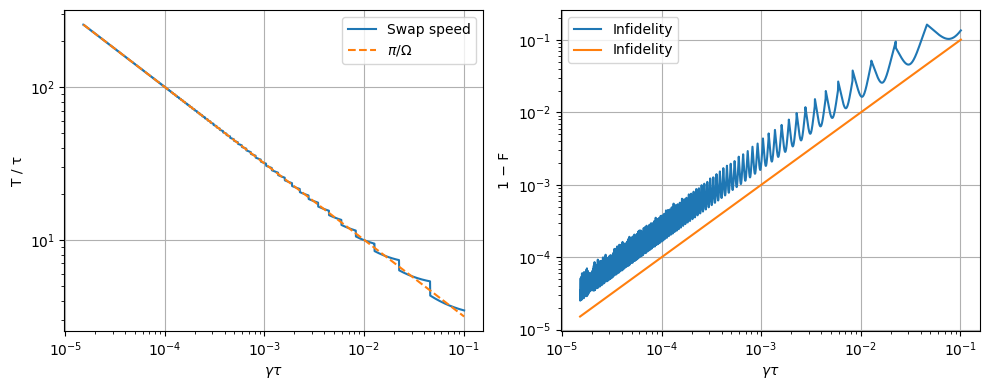

In [ ]:
from expt_sets import expt_002_swapspeed
import numpy as np

gamma_list = np.logspace(np.log10(0.00015), np.log10(1), 2000)
expt_002_swapspeed(
    Delta=0, gamma_list=gamma_list, overwrite=False, T_max=1.5, T_min=0.5
)

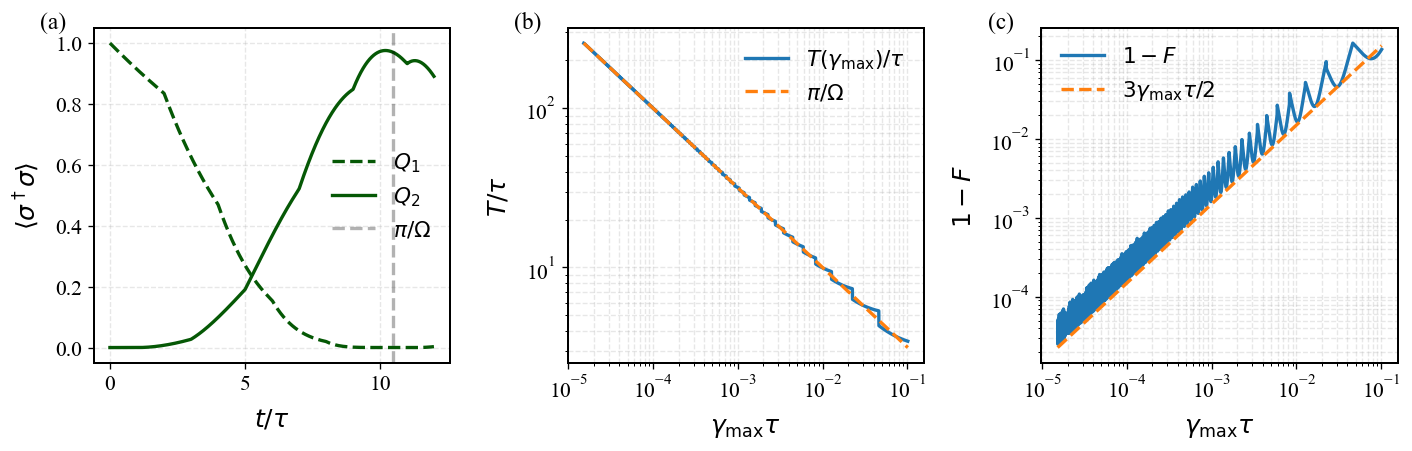

In [ ]:
from expt_sets import swap_appendix_graph

swap_appendix_graph(
    Delta=0.0, gamma=0.09, tau=1.0, T=12.0, dt_max=0.01, figsize=(4, 12)
)

# 2.0 STIRAP

We need to test the performance of the DDE under time-dependent couplings and to compare quantum state transfer driven by time-dependent pulse control with passive state transfer based on constant-coupling swap schemes. Therefore, it is necessary to develop a DDE integrator that supports time-dependent couplings.
**Conclusion**:
- Test the stirap protcol with $g_1 = g_0 \sin (\pi t/(T-\tau) ), g_2 = g_0 \cos (\pi t/(T-\tau) )$
- Test the pulse with delay
\begin{align}
g_1(t)=&
\begin{cases}
g_0 \sin (\pi t/(T-\tau) ), & t>(T-\tau) \\
g_0, & t\le 0
\end{cases}\\
g_2(t)=&
\begin{cases}
g_0 , & t\le \tau \\
g_0\cos (\pi t/(T-\tau) ), & t\ge \tau
\end{cases}\\
\end{align}


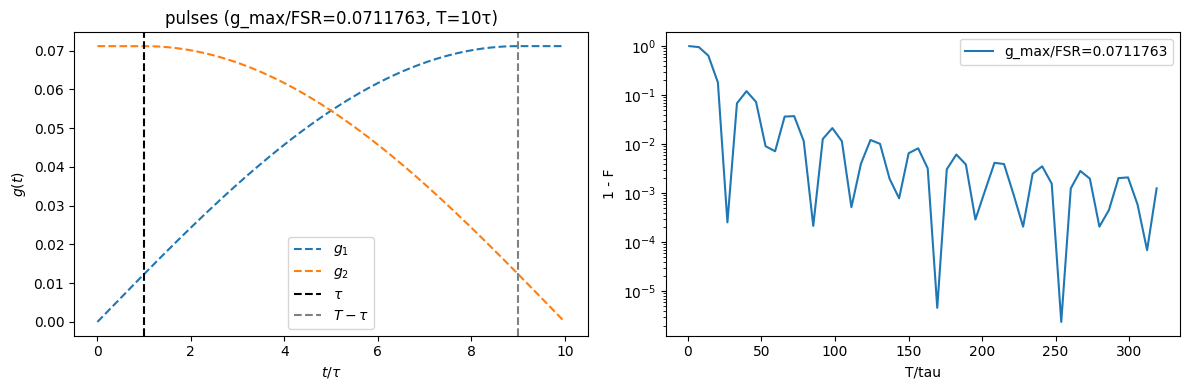

In [1]:
from expt_sets import expt_004_stirap_T_scan
import numpy as np

gamma = 0.1
T_list = np.linspace(0.9, 100 / np.sqrt(gamma) + 2.5, 50)
F = expt_004_stirap_T_scan(
    gamma=gamma,
    T_list=T_list,
    phi=0.0,
    tau=1.0,
    dt_max=0.01,
    n_jobs=-1,
    pulse_delay=False,
)

[info] saved cache: expt_008_cache11_nodelay.npz


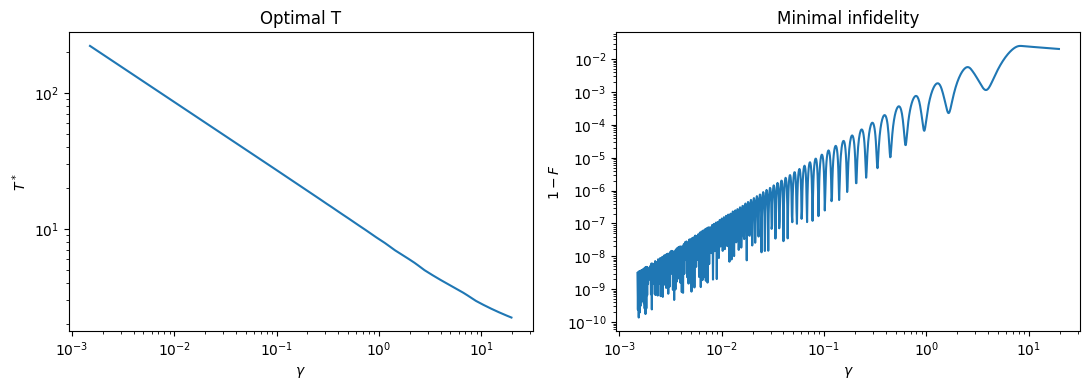

In [2]:
from expt_sets import expt_008_ScanGamma_Refined
import numpy as np

gamma_list = np.logspace(np.log10(0.0015), np.log10(2 * np.pi**2), 1000)
expt_008_ScanGamma_Refined(
    gamma_list,
    T_range=None,
    phi=0.0,
    tau=1.0,
    dt_max=0.01,
    pulse_delay=False,
    n_jobs=-1,
    plot=True,
    cache_file="expt_008_cache11_nodelay.npz",
    overwrite=True,
)

In [ ]:
import numpy as np

np.sqrt(2.9278 / 2) / np.pi

np.float64(0.3851286547817732)

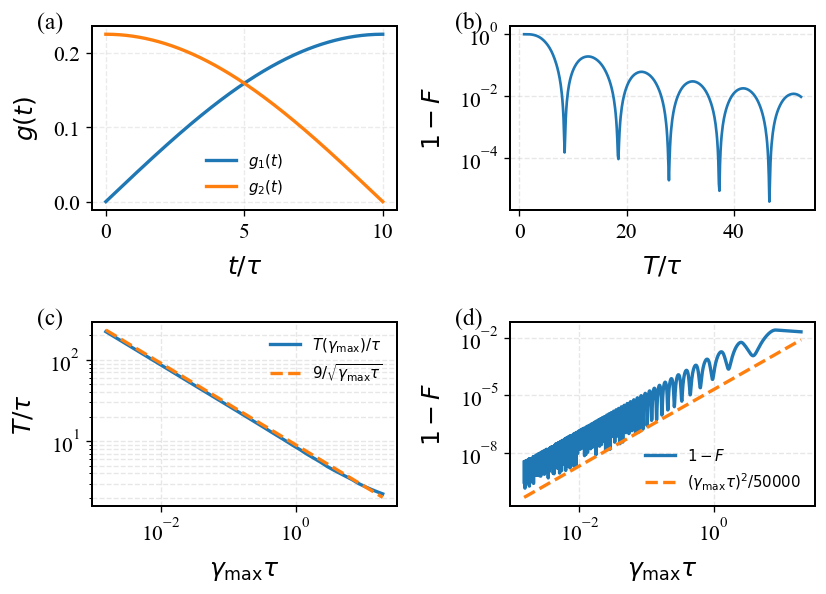

In [1]:
from expt_sets import stirap_appendix_graph
import numpy as np

gamma = 1
T_list = np.linspace(0.9, 50 / np.sqrt(gamma) + 2.5, 500)
stirap_appendix_graph(
    gamma=gamma,
    T_list=T_list,
    pulse_delay=False,
)


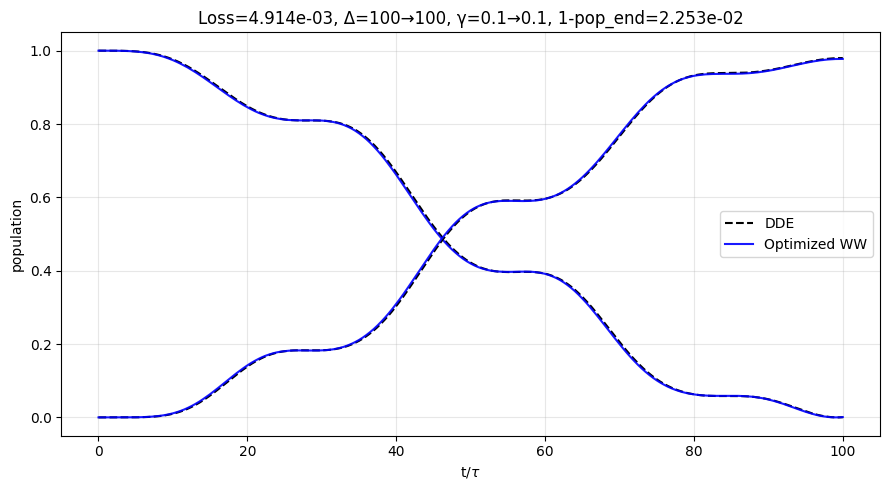

np.float64(0.022527664836928585)

In [1]:
from expt_sets import renormalize_WW_opimized

renormalize_WW_opimized(
    gamma_guess=0.1,
    T=100,
    Delta_guess=100.0,
    tau=1.0,
    dt_max=0.005,
    pulse_delay=False,
    PBC=True,
    n_modes=201,
    n_steps=201,
    plot=True,
    opt=False,
)

Saved to expt_009_renormalized_WW_fidelity.npz  (N=9)


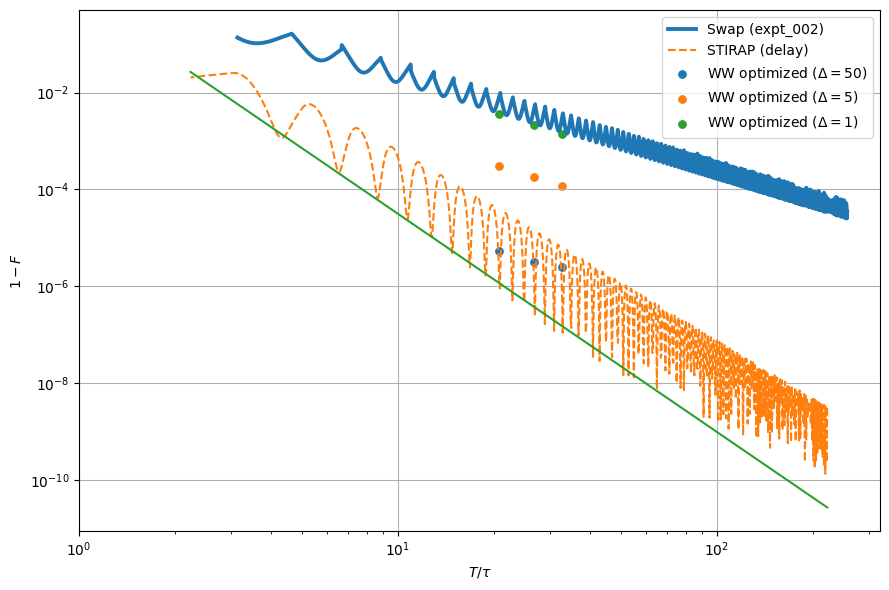

In [1]:
from expt_sets import expt_009_renormalized_WW_fidelity

expt_009_renormalized_WW_fidelity(
    Delta_list=(50.0, 5.0, 1.0), idx_gamma=(498, 445, 403)
)
from expt_sets import plot_IF_vs_T

plot_IF_vs_T(
    data0="expt_002_cache.npz",
    data1="expt_008_cache11_nodelay.npz",
    ww_data="expt_009_renormalized_WW_fidelity.npz",
    tau=1.0,
)

0.9999999861037958

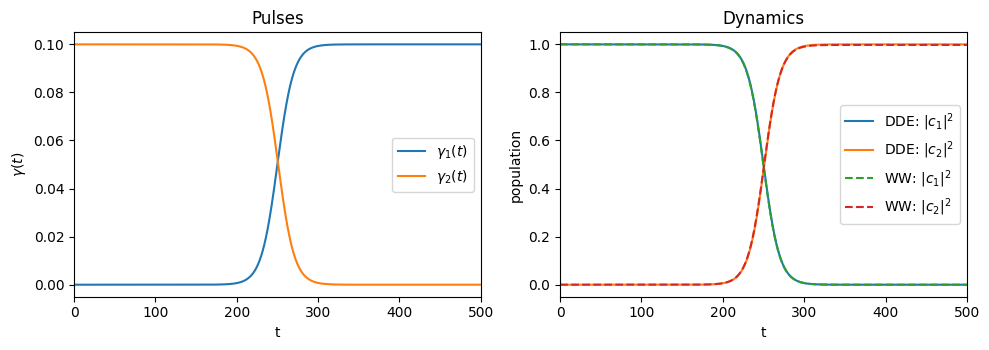

In [4]:
from expt_sets import QST_CZMK

QST_CZMK(gamma=0.1, T=500, tau=1, dt_max=0.01, phi=0.0)

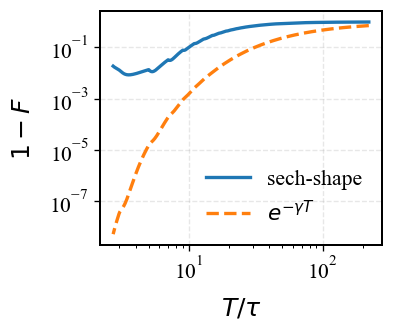

In [2]:
from expt_sets import CZMK_Scan_T
import numpy as np

# gamma = 0.02
# T_list = np.linspace(0.9, 100 / np.sqrt(gamma), 20)
CZMK_Scan_T(
    # gamma=gamma,
    # T_list=T_list,
    cache_file="czmk_scan_T.npz",
    filename="czmk_app.pdf",
    force_recompute=False,
)

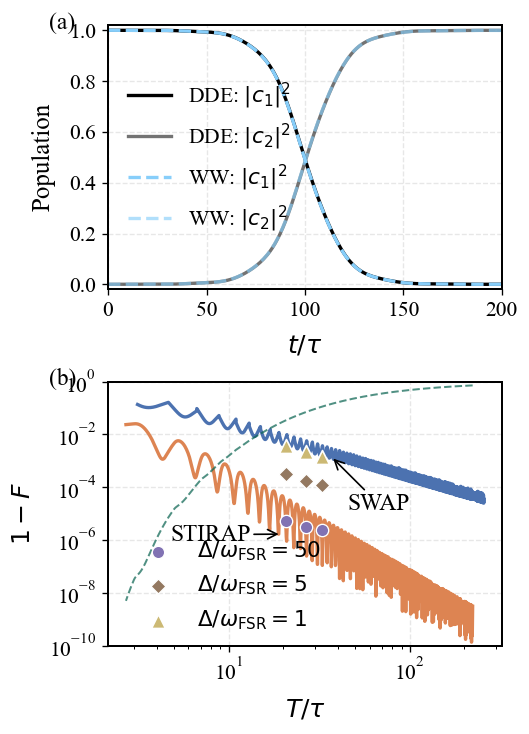

In [5]:
from expt_sets import fig_paper_QST_and_IF_vs_T

fig_paper_QST_and_IF_vs_T(
    tau=1.0,
    gamma=0.1,
    T_dyn=200,
    figsize=(4.3, 6),
    save="figure_qst.pdf",
)